<a href="https://colab.research.google.com/github/msiplab/AtipWork/blob/develop/python/sample02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 輝度値変換 
# 
# 画像処理特論
# 
# 村松 正吾 
# 
# 動作確認: Python 3.7, PyTorch 1.8

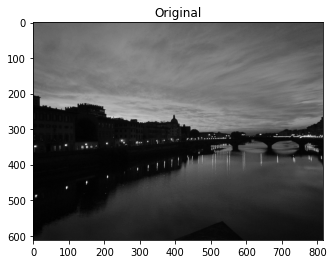

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


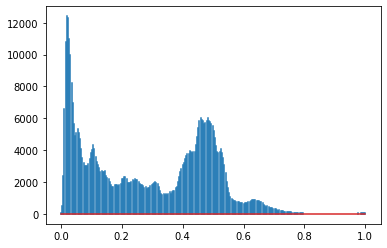

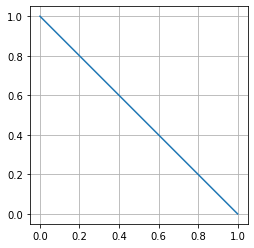

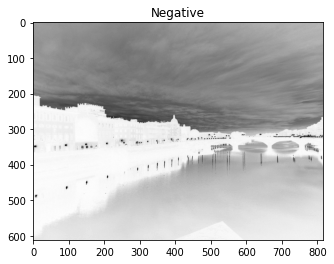

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


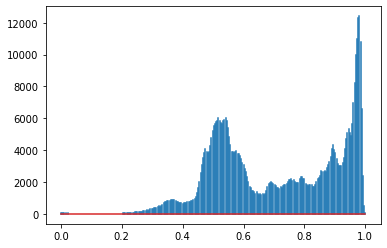

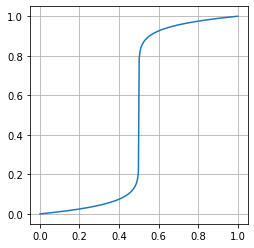

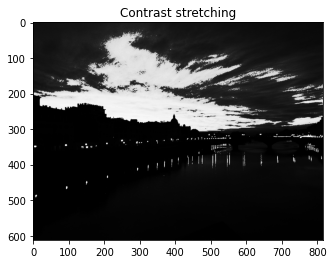

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


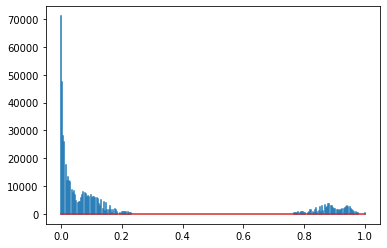

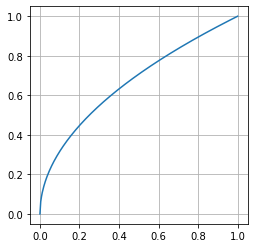

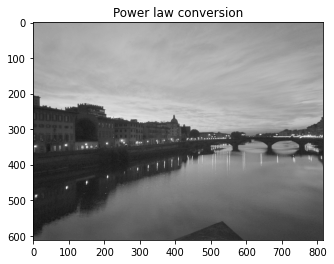

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


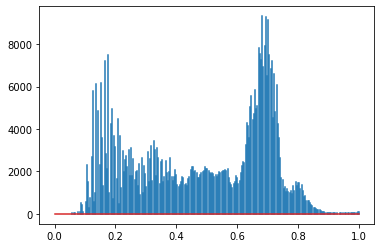

In [2]:
# Intensity transforms
# 
# Advanced Topics in Image Processing
# 
# Shogo MURAMATSU
# 
# Verified: Python 3.7, PyTorch 1.8
# サンプル画像の準備
# (Preparation of sample image)
# 
# 本サンプルで利用する画像データを収めたdata フォルダにパスをとおす。
# 
# Create a path to the data folder that contains images used in this sample.
from PIL import Image
import requests
import torch
import torchvision
from matplotlib import pyplot as plt
im2double = torchvision.transforms.ConvertImageDtype(torch.double)
im2uint8 = torchvision.transforms.ConvertImageDtype(torch.uint8)
rgb2gray = torchvision.transforms.Grayscale()
totensor = torchvision.transforms.ToTensor()
topilimg = torchvision.transforms.ToPILImage()
locs = torch.linspace(0,1,256).numpy()
imhist = lambda x: plt.stem(locs,torch.histc(x,bins=256,min=0.,max=1.),markerfmt='None')

# Reading original image
#I = im2double(rgb2gray(totensor(Image.open('./data/firenzeRgb.jpg'))))
url = 'https://github.com/msiplab/AtipWork/raw/master/data/firenzeRgb.jpg'
I = im2double(rgb2gray(totensor(Image.open(requests.get(url, stream=True).raw))))

plt.figure(1)
plt.imshow(topilimg(I),cmap='gray')
plt.title('Original')
plt.show()
plt.figure(2)
imhist(I)
plt.show()
# ネガ変換
# (Negative conversion)
# 
# $$y=T(x) = 1.0-x$$

# Definition of negative conversion
Tn = lambda x: 1.0-x
plt.figure(3)
plt.plot(locs,Tn(locs))
plt.axis('square')
plt.grid()
plt.show()
# Negative conversion of image I
J = Tn(I)
plt.figure(4)
plt.imshow(topilimg(J),cmap='gray')
plt.title('Negative')
plt.show()
plt.figure(5)
imhist(J)
plt.show()
# 対比伸長
# (Contrast stretching)
# 
# $$y=T(x) = \frac{1}{2}(\mathrm{sign}(2x-1)|2x-1|^{10^{-\alpha}}+1)$$

# Definition of contrast stretching
alpha = 1
Tc = lambda x: 0.5*(torch.sign(2.0*x-1.0)*(torch.pow(torch.abs(2.0*x-1.0),10**(-alpha)))+1.0)
plt.figure(6)
plt.plot(locs,Tc(torch.tensor(locs)).detach().numpy())
plt.axis('square')
plt.grid()
plt.show()
# Contrast stretching of image I
K = Tc(I)
plt.figure(7)
plt.imshow(topilimg(K),cmap='gray')
plt.title('Contrast stretching')
plt.show()
plt.figure(8)
imhist(K)
plt.show()
# べき乗則変換
# (Power law conversion)
# 
# $$y=T(x) = x^\gamma$$  

# Definition of power law conversion
gamma = 0.5
Tp = lambda x: x**gamma
plt.figure(9)
plt.plot(locs,Tp(locs))
plt.axis('square')
plt.grid()
plt.show()
# Power law conversion of image I
L = Tp(I)
plt.figure(10)
plt.imshow(topilimg(L),cmap='gray')
plt.title('Power law conversion')
plt.show()
plt.figure(11)
imhist(L)
plt.show()

In [3]:
# © Copyright, Shogo MURAMATSU, All rights reserved.